# Titanic Eda Analysis

## Author: Varun Ganti


# Titanic Analysis

This project is intended to explore data from the famous titanic crash. The infmaous ship that almost felt invincible to crashing or breaking down. Many factors sttribute to the sinking of the titanic causing millions of lives lost. This analysis will break down the relationships between the demographics of the passengers and their survival rate. To deepen our analysis, we will portray these relationships through exploratory analysis, and data visualzations. 




# Step 1: Import the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Step 2: Read the Ttianic CSV file

In [3]:
titanic_data = pd.read_csv('train.csv')

In [4]:
titanic_data.sample(10)

PassengerId  Survived  Pclass                              Name     Sex  \
197          198         0       3  Olsen, Mr. Karl Siegwart Andreas    male   
216          217         1       3            Honkanen, Miss. Eliina  female   
479          480         1       3          Hirvonen, Miss. Hildur E  female   
156          157         1       3  Gilnagh, Miss. Katherine "Katie"  female   
327          328         1       2           Ball, Mrs. (Ada E Hall)  female   
480          481         0       3    Goodwin, Master. Harold Victor    male   
364          365         0       3               O'Brien, Mr. Thomas    male   
778          779         0       3           Kilgannon, Mr. Thomas J    male   
666          667         0       2       Butler, Mr. Reginald Fenton    male   
388          389         0       3              Sadlier, Mr. Matthew    male   

      Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
197  42.0      0      1              4579   8.4042   NaN        S  
216  27.0      0      0  STON/O2. 3101283   7.9250   NaN        S  
479   2.0      0      1           3101298  12.2875   NaN        S  
156  16.0      0      0             35851   7.7333   NaN        Q  
327  36.0      0      0             28551  13.0000     D        S  
480   9.0      5      2           CA 2144  46.9000   NaN        S  
364   NaN      1      0            370365  15.5000   NaN        Q  
778   NaN      0      0             36865   7.7375   NaN        Q  
666  25.0      0      0            234686  13.0000   NaN        S  
388   NaN      0      0            367655   7.7292   NaN        Q

In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Understand Variables: DATA DICT


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**Passenger ID**|*int*|Titanic Data|Numeric sequential id to uniquely identify each passanger.| 
|**Survived**|*int*|Titanic Data|0 = No, 1 = Yes|
|**Pclass**|*int*|Titanic Data|1- lower class, 2- middle class, 3- upper class. SocioEconomic Status|
|**Name**|*object*|Titanic Data|Name of passanger|
|**Sex**|*Object*|Titanic Data|Female or Male|
|**Age**|*float *|Titanic Data|Age in Years. Fractions of age. Unkown is filled by an xx|
|**sibssp**|*int*|Titanic Data|defines family relaitionshsips. Sibling or Spouse. 1 is sibling, 0 spouse|
|**Parch**|*int*|Titanic Data|defines familt relaitons. parent, child. if traveled with nanny they are 0|
|**Ticket**|*object*|Titanic Data|Ticket Number|
|**Fare**|*Float*|Titanic Data|Ticket Fare|
|**Cabin**|*object*|Titanic Data|Cabin Number|
|**Embarked**|*object*|Titanic Data|Port of Embarkation|


In [6]:
titanic_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [7]:
missing = titanic_data.isnull().sum(axis=0)

In [8]:
columnsx = list(titanic_data.columns)

# Use a heatmap to show which variables have the least null

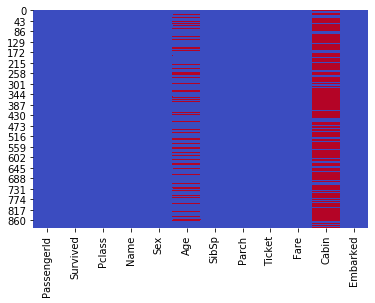

In [9]:
sns.heatmap(titanic_data.isnull(), cbar = False, cmap = 'coolwarm')

In [10]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [11]:
import missingno as ms

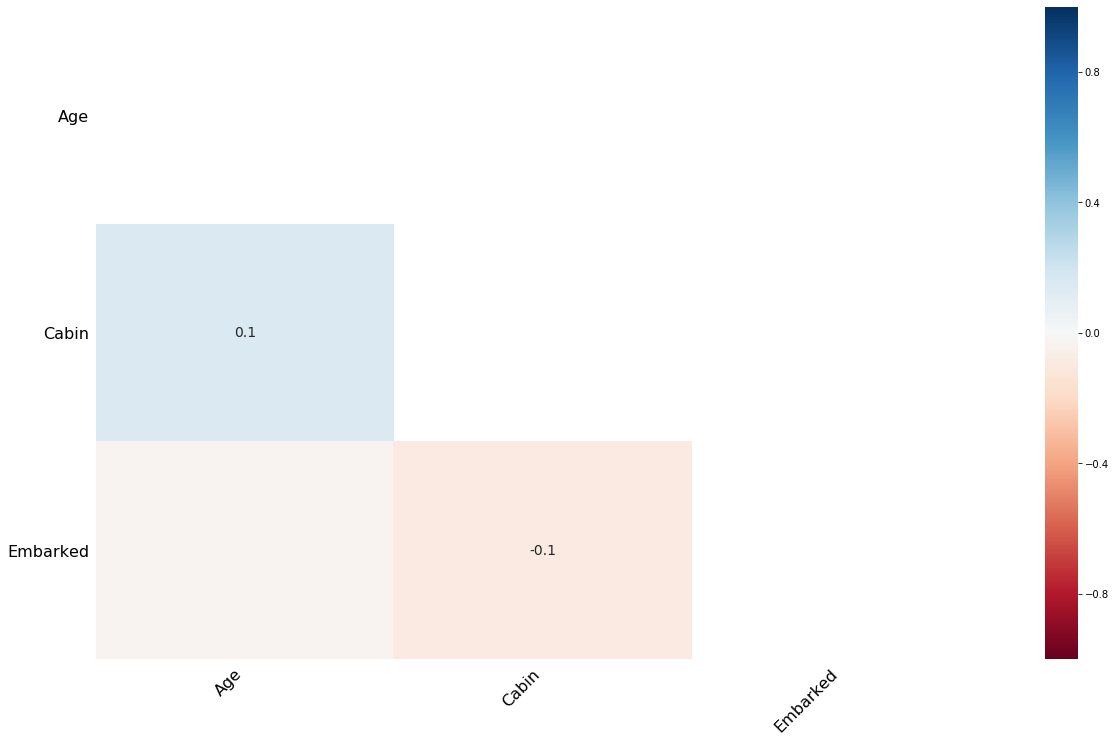

In [12]:
ms.heatmap(titanic_data)

# Bar char to show which variables have missing values. 

1)Age
2)Cabin

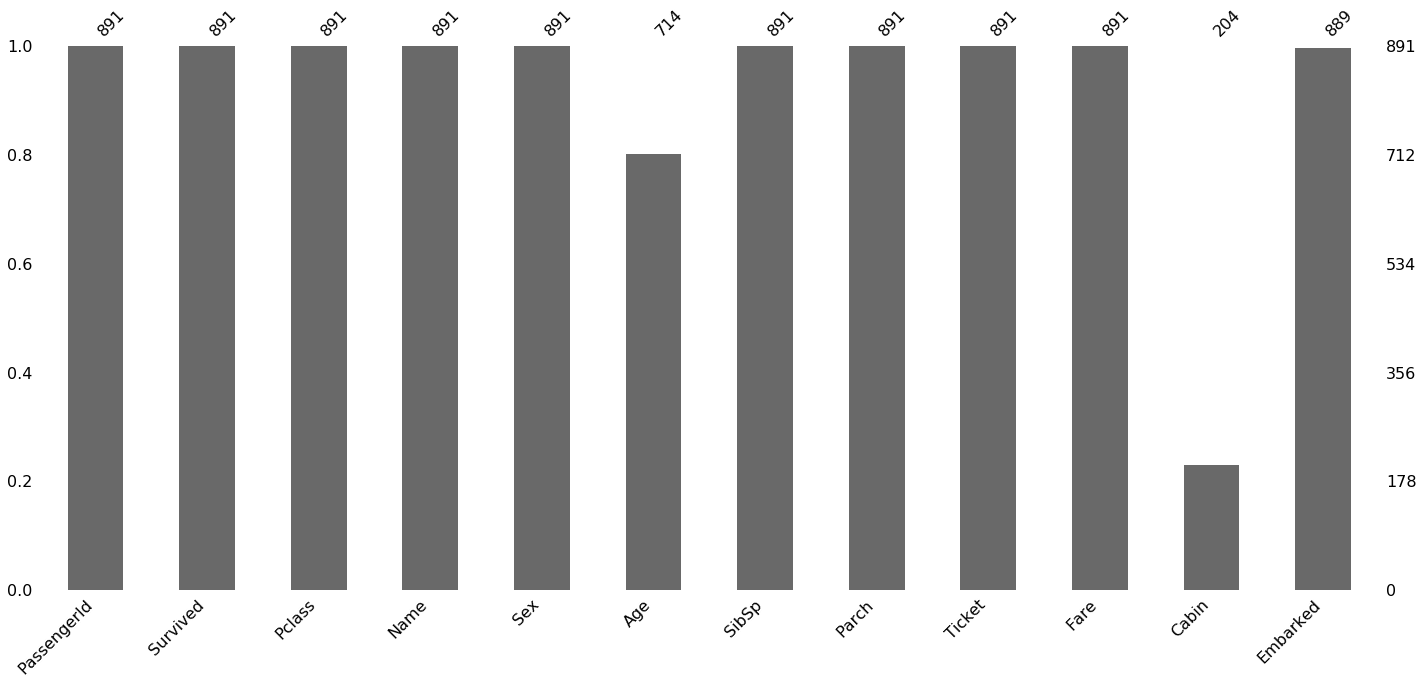

In [13]:
ms.bar(titanic_data)

In [14]:
titanic_data.sample(10)

PassengerId  Survived  Pclass                             Name     Sex  \
516          517         1       2     Lemore, Mrs. (Amelia Milley)  female   
831          832         1       2  Richards, Master. George Sibley    male   
129          130         0       3               Ekstrom, Mr. Johan    male   
633          634         0       1    Parr, Mr. William Henry Marsh    male   
798          799         0       3     Ibrahim Shawah, Mr. Yousseff    male   
688          689         0       3  Fischer, Mr. Eberhard Thelander    male   
173          174         0       3        Sivola, Mr. Antti Wilhelm    male   
693          694         0       3                 Saad, Mr. Khalil    male   
882          883         0       3     Dahlberg, Miss. Gerda Ulrika  female   
124          125         0       1      White, Mr. Percival Wayland    male   

       Age  SibSp  Parch             Ticket     Fare Cabin Embarked  
516  34.00      0      0         C.A. 34260  10.5000   F33        S  
831   0.83      1      1              29106  18.7500   NaN        S  
129  45.00      0      0             347061   6.9750   NaN        S  
633    NaN      0      0             112052   0.0000   NaN        S  
798  30.00      0      0               2685   7.2292   NaN        C  
688  18.00      0      0             350036   7.7958   NaN        S  
173  21.00      0      0  STON/O 2. 3101280   7.9250   NaN        S  
693  25.00      0      0               2672   7.2250   NaN        C  
882  22.00      0      0               7552  10.5167   NaN        S  
124  54.00      0      1              35281  77.2875   D26        S

In [15]:
titanic_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [16]:
##fill cabin with emoji
titanic_data['Cabin'].fillna('¯\(ツ)/¯', inplace = True)

In [17]:
titanic_data.sample(10)

PassengerId  Survived  Pclass                              Name     Sex  \
381          382         1       3       Nakid, Miss. Maria ("Mary")  female   
587          588         1       1  Frolicher-Stehli, Mr. Maxmillian    male   
883          884         0       2     Banfield, Mr. Frederick James    male   
832          833         0       3                    Saad, Mr. Amin    male   
42            43         0       3               Kraeff, Mr. Theodor    male   
356          357         1       1       Bowerman, Miss. Elsie Edith  female   
852          853         0       3           Boulos, Miss. Nourelain  female   
44            45         1       3     Devaney, Miss. Margaret Delia  female   
479          480         1       3          Hirvonen, Miss. Hildur E  female   
306          307         1       1           Fleming, Miss. Margaret  female   

      Age  SibSp  Parch            Ticket      Fare    Cabin Embarked  
381   1.0      0      2              2653   15.7417  ¯\(ツ)/¯        C  
587  60.0      1      1             13567   79.2000      B41        C  
883  28.0      0      0  C.A./SOTON 34068   10.5000  ¯\(ツ)/¯        S  
832   NaN      0      0              2671    7.2292  ¯\(ツ)/¯        C  
42    NaN      0      0            349253    7.8958  ¯\(ツ)/¯        C  
356  22.0      0      1            113505   55.0000      E33        S  
852   9.0      1      1              2678   15.2458  ¯\(ツ)/¯        C  
44   19.0      0      0            330958    7.8792  ¯\(ツ)/¯        Q  
479   2.0      0      1           3101298   12.2875  ¯\(ツ)/¯        S  
306   NaN      0      0             17421  110.8833  ¯\(ツ)/¯        C

In [18]:

##convert age to middle value
def convert_age(age):
    
    if age == np.nan:
        return age.median()
    else:
        return age
    

In [19]:
## not asked but if i were a DS i would fill age with the median

In [20]:
##titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace = True)

In [21]:
##titanic_data.info()

In [22]:
##Locate missing values of embarked

null_embarked = titanic_data['Embarked'].isnull()

titanic_data.loc[null_embarked, :]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN

In [23]:
##drop those values

titanic_data.drop([61,829], inplace = True)



In [24]:
titanic_data.shape

(889, 12)

In [25]:
titanic_data.sample(20)

PassengerId  Survived  Pclass  \
466          467         0       2   
164          165         0       3   
359          360         1       3   
258          259         1       1   
383          384         1       1   
832          833         0       3   
887          888         1       1   
571          572         1       1   
546          547         1       2   
460          461         1       1   
649          650         1       3   
89            90         0       3   
340          341         1       2   
404          405         0       3   
806          807         0       1   
333          334         0       3   
355          356         0       3   
633          634         0       1   
848          849         0       2   
396          397         0       3   

                                                  Name     Sex   Age  SibSp  \
466                              Campbell, Mr. William    male   NaN      0   
164                       Panula, Master. Eino Viljami    male   1.0      4   
359                  Mockler, Miss. Helen Mary "Ellie"  female   NaN      0   
258                                   Ward, Miss. Anna  female  35.0      0   
383  Holverson, Mrs. Alexander Oskar (Mary Aline To...  female  35.0      1   
832                                     Saad, Mr. Amin    male   NaN      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
571      Appleton, Mrs. Edward Dale (Charlotte Lamson)  female  53.0      2   
546                  Beane, Mrs. Edward (Ethel Clarke)  female  19.0      1   
460                                Anderson, Mr. Harry    male  48.0      0   
649                    Stanley, Miss. Amy Zillah Elsie  female  23.0      0   
89                              Celotti, Mr. Francesco    male  24.0      0   
340                     Navratil, Master. Edmond Roger    male   2.0      1   
404                            Oreskovic, Miss. Marija  female  20.0      0   
806                             Andrews, Mr. Thomas Jr    male  39.0      0   
333                    Vander Planke, Mr. Leo Edmondus    male  16.0      2   
355                        Vanden Steen, Mr. Leo Peter    male  28.0      0   
633                      Parr, Mr. William Henry Marsh    male   NaN      0   
848                                  Harper, Rev. John    male  28.0      0   
396                                Olsson, Miss. Elina  female  31.0      0   

     Parch    Ticket      Fare    Cabin Embarked  
466      0    239853    0.0000  ¯\(ツ)/¯        S  
164      1   3101295   39.6875  ¯\(ツ)/¯        S  
359      0    330980    7.8792  ¯\(ツ)/¯        Q  
258      0  PC 17755  512.3292  ¯\(ツ)/¯        C  
383      0    113789   52.0000  ¯\(ツ)/¯        S  
832      0      2671    7.2292  ¯\(ツ)/¯        C  
887      0    112053   30.0000      B42        S  
571      0     11769   51.4792     C101        S  
546      0      2908   26.0000  ¯\(ツ)/¯        S  
460      0     19952   26.5500      E12        S  
649      0  CA. 2314    7.5500  ¯\(ツ)/¯        S  
89       0    343275    8.0500  ¯\(ツ)/¯        S  
340      1    230080   26.0000       F2        S  
404      0    315096    8.6625  ¯\(ツ)/¯        S  
806      0    112050    0.0000      A36        S  
333      0    345764   18.0000  ¯\(ツ)/¯        S  
355      0    345783    9.5000  ¯\(ツ)/¯        S  
633      0    112052    0.0000  ¯\(ツ)/¯        S  
848      1    248727   33.0000  ¯\(ツ)/¯        S  
396      0    350407    7.8542  ¯\(ツ)/¯        S

In [26]:
## sum family count
##sum sibling to parch

titanic_data['FamilyCount'] = titanic_data['SibSp'] + titanic_data['Parch']

In [27]:
titanic_data.sample(20)

PassengerId  Survived  Pclass  \
714          715         0       2   
401          402         0       3   
317          318         0       2   
640          641         0       3   
478          479         0       3   
333          334         0       3   
596          597         1       2   
9             10         1       2   
410          411         0       3   
853          854         1       1   
84            85         1       2   
601          602         0       3   
112          113         0       3   
507          508         1       1   
269          270         1       1   
648          649         0       3   
44            45         1       3   
179          180         0       3   
561          562         0       3   
279          280         1       3   

                                              Name     Sex   Age  SibSp  \
714                          Greenberg, Mr. Samuel    male  52.0      0   
401                                Adams, Mr. John    male  26.0      0   
317                           Moraweck, Dr. Ernest    male  54.0      0   
640                         Jensen, Mr. Hans Peder    male  20.0      0   
478                      Karlsson, Mr. Nils August    male  22.0      0   
333                Vander Planke, Mr. Leo Edmondus    male  16.0      2   
596                     Leitch, Miss. Jessie Wills  female   NaN      0   
9              Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
410                             Sdycoff, Mr. Todor    male   NaN      0   
853                      Lines, Miss. Mary Conover  female  16.0      0   
84                             Ilett, Miss. Bertha  female  17.0      0   
601                           Slabenoff, Mr. Petco    male   NaN      0   
112                         Barton, Mr. David John    male  22.0      0   
507  Bradley, Mr. George ("George Arthur Brayton")    male   NaN      0   
269                         Bissette, Miss. Amelia  female  35.0      0   
648                             Willey, Mr. Edward    male   NaN      0   
44                   Devaney, Miss. Margaret Delia  female  19.0      0   
179                            Leonard, Mr. Lionel    male  36.0      0   
561                              Sivic, Mr. Husein    male  40.0      0   
279               Abbott, Mrs. Stanton (Rosa Hunt)  female  35.0      1   

     Parch         Ticket      Fare    Cabin Embarked  FamilyCount  
714      0         250647   13.0000  ¯\(ツ)/¯        S            0  
401      0         341826    8.0500  ¯\(ツ)/¯        S            0  
317      0          29011   14.0000  ¯\(ツ)/¯        S            0  
640      0         350050    7.8542  ¯\(ツ)/¯        S            0  
478      0         350060    7.5208  ¯\(ツ)/¯        S            0  
333      0         345764   18.0000  ¯\(ツ)/¯        S            2  
596      0         248727   33.0000  ¯\(ツ)/¯        S            0  
9        0         237736   30.0708  ¯\(ツ)/¯        C            1  
410      0         349222    7.8958  ¯\(ツ)/¯        S            0  
853      1       PC 17592   39.4000      D28        S            1  
84       0     SO/C 14885   10.5000  ¯\(ツ)/¯        S            0  
601      0         349214    7.8958  ¯\(ツ)/¯        S            0  
112      0         324669    8.0500  ¯\(ツ)/¯        S            0  
507      0         111427   26.5500  ¯\(ツ)/¯        S            0  
269      0       PC 17760  135.6333      C99        S            0  
648      0  S.O./P.P. 751    7.5500  ¯\(ツ)/¯        S            0  
44       0         330958    7.8792  ¯\(ツ)/¯        Q            0  
179      0           LINE    0.0000  ¯\(ツ)/¯        S            0  
561      0         349251    7.8958  ¯\(ツ)/¯        S            0  
279      1      C.A. 2673   20.2500  ¯\(ツ)/¯        S            2

In [28]:

#if reverend in rev return 1 or 0

def reverend_name(string):
    
    rev = string.split()
    
    if 'Rev.' in rev:
        return 1
    else:
        return 0

In [29]:
##apply function to the column reverend

titanic_data['Reverend'] = titanic_data['Name'].apply(reverend_name)

In [30]:
titanic_data['Reverend'].value_counts()

0    883
1      6
Name: Reverend, dtype: int64

In [31]:
##test to see if reverend = 1

check_filter = titanic_data[titanic_data['Reverend'] == 1]
check_filter

PassengerId  Survived  Pclass                               Name   Sex  \
149          150         0       2  Byles, Rev. Thomas Roussel Davids  male   
150          151         0       2         Bateman, Rev. Robert James  male   
249          250         0       2      Carter, Rev. Ernest Courtenay  male   
626          627         0       2     Kirkland, Rev. Charles Leonard  male   
848          849         0       2                  Harper, Rev. John  male   
886          887         0       2              Montvila, Rev. Juozas  male   

      Age  SibSp  Parch       Ticket    Fare    Cabin Embarked  FamilyCount  \
149  42.0      0      0       244310  13.000  ¯\(ツ)/¯        S            0   
150  51.0      0      0  S.O.P. 1166  12.525  ¯\(ツ)/¯        S            0   
249  54.0      1      0       244252  26.000  ¯\(ツ)/¯        S            1   
626  57.0      0      0       219533  12.350  ¯\(ツ)/¯        Q            0   
848  28.0      0      1       248727  33.000  ¯\(ツ)/¯        S            1   
886  27.0      0      0       211536  13.000  ¯\(ツ)/¯        S            0   

     Reverend  
149         1  
150         1  
249         1  
626         1  
848         1  
886         1

In [32]:
titanic_data = pd.get_dummies(titanic_data, columns = ['Embarked'])

In [33]:
titanic_data.sample(10)

PassengerId  Survived  Pclass                                  Name  \
75            76         0       3               Moen, Mr. Sigurd Hansen   
485          486         0       3                Lefebre, Miss. Jeannie   
390          391         1       1            Carter, Mr. William Ernest   
462          463         0       1                     Gee, Mr. Arthur H   
867          868         0       1  Roebling, Mr. Washington Augustus II   
242          243         0       2       Coleridge, Mr. Reginald Charles   
338          339         1       3                 Dahl, Mr. Karl Edwart   
653          654         1       3         O'Leary, Miss. Hanora "Norah"   
806          807         0       1                Andrews, Mr. Thomas Jr   
14            15         0       3  Vestrom, Miss. Hulda Amanda Adolfina   

        Sex   Age  SibSp  Parch       Ticket      Fare    Cabin  FamilyCount  \
75     male  25.0      0      0       348123    7.6500    F G73            0   
485  female   NaN      3      1         4133   25.4667  ¯\(ツ)/¯            4   
390    male  36.0      1      2       113760  120.0000  B96 B98            3   
462    male  47.0      0      0       111320   38.5000      E63            0   
867    male  31.0      0      0     PC 17590   50.4958      A24            0   
242    male  29.0      0      0  W./C. 14263   10.5000  ¯\(ツ)/¯            0   
338    male  45.0      0      0         7598    8.0500  ¯\(ツ)/¯            0   
653  female   NaN      0      0       330919    7.8292  ¯\(ツ)/¯            0   
806    male  39.0      0      0       112050    0.0000      A36            0   
14   female  14.0      0      0       350406    7.8542  ¯\(ツ)/¯            0   

     Reverend  Embarked_C  Embarked_Q  Embarked_S  
75          0           0           0           1  
485         0           0           0           1  
390         0           0           0           1  
462         0           0           0           1  
867         0           0           0           1  
242         0           0           0           1  
338         0           0           0           1  
653         0           0           1           0  
806         0           0           0           1  
14          0           0           0           1

In [34]:
##get dummies function for dummy variables

titanic_data = pd.get_dummies(titanic_data, columns = ['Sex'])

In [35]:
titanic_data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name   Age  SibSp  Parch  \
0                              Braund, Mr. Owen Harris  22.0      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                               Heikkinen, Miss. Laina  26.0      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                             Allen, Mr. William Henry  35.0      0      0   
..                                                 ...   ...    ...    ...   
886                              Montvila, Rev. Juozas  27.0      0      0   
887                       Graham, Miss. Margaret Edith  19.0      0      0   
888           Johnston, Miss. Catherine Helen "Carrie"   NaN      1      2   
889                              Behr, Mr. Karl Howell  26.0      0      0   
890                                Dooley, Mr. Patrick  32.0      0      0   

               Ticket     Fare    Cabin  FamilyCount  Reverend  Embarked_C  \
0           A/5 21171   7.2500  ¯\(ツ)/¯            1         0           0   
1            PC 17599  71.2833      C85            1         0           1   
2    STON/O2. 3101282   7.9250  ¯\(ツ)/¯            0         0           0   
3              113803  53.1000     C123            1         0           0   
4              373450   8.0500  ¯\(ツ)/¯            0         0           0   
..                ...      ...      ...          ...       ...         ...   
886            211536  13.0000  ¯\(ツ)/¯            0         1           0   
887            112053  30.0000      B42            0         0           0   
888        W./C. 6607  23.4500  ¯\(ツ)/¯            3         0           0   
889            111369  30.0000     C148            0         0           1   
890            370376   7.7500  ¯\(ツ)/¯            0         0           0   

     Embarked_Q  Embarked_S  Sex_female  Sex_male  
0             0           1           0         1  
1             0           0           1         0  
2             0           1           1         0  
3             0           1           1         0  
4             0           1           0         1  
..          ...         ...         ...       ...  
886           0           1           0         1  
887           0           1           1         0  
888           0           1           1         0  
889           0           0           0         1  
890           1           0           0         1  

[889 rows x 17 columns]

In [36]:
##test the group method

survival_titanic = titanic_data.groupby('Survived')


In [37]:
##Total Survived

survived = titanic_data['Survived'].sum()

print("The total number of survivors were :" , survived, "Passengers")


The total number of survivors were : 340 Passengers


In [38]:

##sum of survived divided by total survived or not survived

survival_rate =  (titanic_data['Survived'].sum()) / len(titanic_data['Survived']) * 100


print('The survival rate on the titanic rate was about: {0}%'.format(round(survival_rate)))
                                                        
                                                        
                                                        

The survival rate on the titanic rate was about: 38.0%


In [39]:
## male survivors

male_survivors = titanic_data[titanic_data['Sex_male'] == 1]

In [40]:
male_survivors

PassengerId  Survived  Pclass                            Name   Age  \
0              1         0       3         Braund, Mr. Owen Harris  22.0   
4              5         0       3        Allen, Mr. William Henry  35.0   
5              6         0       3                Moran, Mr. James   NaN   
6              7         0       1         McCarthy, Mr. Timothy J  54.0   
7              8         0       3  Palsson, Master. Gosta Leonard   2.0   
..           ...       ...     ...                             ...   ...   
883          884         0       2   Banfield, Mr. Frederick James  28.0   
884          885         0       3          Sutehall, Mr. Henry Jr  25.0   
886          887         0       2           Montvila, Rev. Juozas  27.0   
889          890         1       1           Behr, Mr. Karl Howell  26.0   
890          891         0       3             Dooley, Mr. Patrick  32.0   

     SibSp  Parch            Ticket     Fare    Cabin  FamilyCount  Reverend  \
0        1      0         A/5 21171   7.2500  ¯\(ツ)/¯            1         0   
4        0      0            373450   8.0500  ¯\(ツ)/¯            0         0   
5        0      0            330877   8.4583  ¯\(ツ)/¯            0         0   
6        0      0             17463  51.8625      E46            0         0   
7        3      1            349909  21.0750  ¯\(ツ)/¯            4         0   
..     ...    ...               ...      ...      ...          ...       ...   
883      0      0  C.A./SOTON 34068  10.5000  ¯\(ツ)/¯            0         0   
884      0      0   SOTON/OQ 392076   7.0500  ¯\(ツ)/¯            0         0   
886      0      0            211536  13.0000  ¯\(ツ)/¯            0         1   
889      0      0            111369  30.0000     C148            0         0   
890      0      0            370376   7.7500  ¯\(ツ)/¯            0         0   

     Embarked_C  Embarked_Q  Embarked_S  Sex_female  Sex_male  
0             0           0           1           0         1  
4             0           0           1           0         1  
5             0           1           0           0         1  
6             0           0           1           0         1  
7             0           0           1           0         1  
..          ...         ...         ...         ...       ...  
883           0           0           1           0         1  
884           0           0           1           0         1  
886           0           0           1           0         1  
889           1           0           0           0         1  
890           0           1           0           0         1  

[577 rows x 17 columns]

In [41]:
total_male = male_survivors[male_survivors['Survived'] == 1]

In [42]:
##count survived of males

print("the total amount of male survivors:" , total_male['Survived'].count())

the total amount of male survivors: 109


# I predict female has a higher survival rate than than males.

In [96]:
##count survived of females

female_survivors = titanic_data[titanic_data['Sex_female'] == 1]

In [44]:
total_female = female_survivors[female_survivors['Survived'] == 1]

In [45]:
print("The total amount of Female Survivors", total_female['Survived'].count())

The total amount of Female Survivors 231


# My prediction was correct

In [46]:
total_female['Survived'].count() + total_male['Survived'].count()

340

In [47]:
male_rate = ((total_male['Survived'].count())/ (titanic_data['Sex_male'].sum()))  * 100

print('The survival rate on the titanic rate was about: {0}%'.format(round(male_rate,2)))

The survival rate on the titanic rate was about: 18.89%


In [48]:
female_rate = ((total_female['Survived'].count())/ (titanic_data['Sex_female'].sum()))  * 100

print('The survival rate on the titanic rate was about: {0}%'.format(round(female_rate,2)))


The survival rate on the titanic rate was about: 74.04%


In [49]:
lower_class = titanic_data[titanic_data['Pclass'] == 1]

In [50]:
lower_class

PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
11            12         1       1   
23            24         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name   Age  SibSp  Parch  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
6                              McCarthy, Mr. Timothy J  54.0      0      0   
11                            Bonnell, Miss. Elizabeth  58.0      0      0   
23                        Sloper, Mr. William Thompson  28.0      0      0   
..                                                 ...   ...    ...    ...   
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  47.0      1      1   
872                           Carlsson, Mr. Frans Olof  33.0      0      0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  56.0      0      1   
887                       Graham, Miss. Margaret Edith  19.0      0      0   
889                              Behr, Mr. Karl Howell  26.0      0      0   

       Ticket     Fare        Cabin  FamilyCount  Reverend  Embarked_C  \
1    PC 17599  71.2833          C85            1         0           1   
3      113803  53.1000         C123            1         0           0   
6       17463  51.8625          E46            0         0           0   
11     113783  26.5500         C103            0         0           0   
23     113788  35.5000           A6            0         0           0   
..        ...      ...          ...          ...       ...         ...   
871     11751  52.5542          D35            2         0           0   
872       695   5.0000  B51 B53 B55            0         0           0   
879     11767  83.1583          C50            1         0           1   
887    112053  30.0000          B42            0         0           0   
889    111369  30.0000         C148            0         0           1   

     Embarked_Q  Embarked_S  Sex_female  Sex_male  
1             0           0           1         0  
3             0           1           1         0  
6             0           1           0         1  
11            0           1           1         0  
23            0           1           0         1  
..          ...         ...         ...       ...  
871           0           1           1         0  
872           0           1           0         1  
879           0           0           1         0  
887           0           1           1         0  
889           0           0           0         1  

[214 rows x 17 columns]

In [51]:
lower_class_survived = lower_class[lower_class['Survived'] == 1]

In [52]:
lower_class_survived


PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
11            12         1       1   
23            24         1       1   
31            32         1       1   
..           ...       ...     ...   
862          863         1       1   
871          872         1       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name   Age  SibSp  Parch  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
11                            Bonnell, Miss. Elizabeth  58.0      0      0   
23                        Sloper, Mr. William Thompson  28.0      0      0   
31      Spencer, Mrs. William Augustus (Marie Eugenie)   NaN      1      0   
..                                                 ...   ...    ...    ...   
862  Swift, Mrs. Frederick Joel (Margaret Welles Ba...  48.0      0      0   
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  47.0      1      1   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  56.0      0      1   
887                       Graham, Miss. Margaret Edith  19.0      0      0   
889                              Behr, Mr. Karl Howell  26.0      0      0   

       Ticket      Fare Cabin  FamilyCount  Reverend  Embarked_C  Embarked_Q  \
1    PC 17599   71.2833   C85            1         0           1           0   
3      113803   53.1000  C123            1         0           0           0   
11     113783   26.5500  C103            0         0           0           0   
23     113788   35.5000    A6            0         0           0           0   
31   PC 17569  146.5208   B78            1         0           1           0   
..        ...       ...   ...          ...       ...         ...         ...   
862     17466   25.9292   D17            0         0           0           0   
871     11751   52.5542   D35            2         0           0           0   
879     11767   83.1583   C50            1         0           1           0   
887    112053   30.0000   B42            0         0           0           0   
889    111369   30.0000  C148            0         0           1           0   

     Embarked_S  Sex_female  Sex_male  
1             0           1         0  
3             1           1         0  
11            1           1         0  
23            1           0         1  
31            0           1         0  
..          ...         ...       ...  
862           1           1         0  
871           1           1         0  
879           0           1         0  
887           1           1         0  
889           0           0         1  

[134 rows x 17 columns]

In [53]:
lower_class_rate = ((lower_class_survived['Survived'].count())/ (titanic_data['Survived'].sum()))  * 100

print('The survival rate on the titanic rate was about: {0}%'.format(round(lower_class_rate,2)))

The survival rate on the titanic rate was about: 39.41%


In [54]:

middle_class = titanic_data[titanic_data['Pclass'] == 2]
middle_class_survived = middle_class[middle_class['Survived'] == 1]

middle_class_rate = ((middle_class_survived['Survived'].count())/ (titanic_data['Survived'].sum()))  * 100

print('The survival rate on the titanic rate was about: {0}%'.format(round(middle_class_rate,2)))

The survival rate on the titanic rate was about: 25.59%


In [55]:

upper_class = titanic_data[titanic_data['Pclass'] == 3]
upper_class_survived = upper_class[upper_class['Survived'] == 1]

upper_class_rate = ((upper_class_survived['Survived'].count())/ (titanic_data['Survived'].sum()))  * 100

print('The survival rate on the titanic rate was about: {0}%'.format(round(upper_class_rate,2)))

The survival rate on the titanic rate was about: 35.0%


# Wow the lower class had the highest survival rate. This being the egocentric upper class on the boat. They were overconfident  and blind to the actual probelms of the boat

In [56]:
filter_reverand = titanic_data[titanic_data['Reverend'] == 1]

filter_reverand

PassengerId  Survived  Pclass                               Name   Age  \
149          150         0       2  Byles, Rev. Thomas Roussel Davids  42.0   
150          151         0       2         Bateman, Rev. Robert James  51.0   
249          250         0       2      Carter, Rev. Ernest Courtenay  54.0   
626          627         0       2     Kirkland, Rev. Charles Leonard  57.0   
848          849         0       2                  Harper, Rev. John  28.0   
886          887         0       2              Montvila, Rev. Juozas  27.0   

     SibSp  Parch       Ticket    Fare    Cabin  FamilyCount  Reverend  \
149      0      0       244310  13.000  ¯\(ツ)/¯            0         1   
150      0      0  S.O.P. 1166  12.525  ¯\(ツ)/¯            0         1   
249      1      0       244252  26.000  ¯\(ツ)/¯            1         1   
626      0      0       219533  12.350  ¯\(ツ)/¯            0         1   
848      0      1       248727  33.000  ¯\(ツ)/¯            1         1   
886      0      0       211536  13.000  ¯\(ツ)/¯            0         1   

     Embarked_C  Embarked_Q  Embarked_S  Sex_female  Sex_male  
149           0           0           1           0         1  
150           0           0           1           0         1  
249           0           0           1           0         1  
626           0           1           0           0         1  
848           0           0           1           0         1  
886           0           0           1           0         1

In [57]:
print("The number of reverends who survived are:",
      filter_reverand[filter_reverand['Survived'] == 1]['Survived'].count())

The number of reverends who survived are: 0


# Reverends have a caretaking personality. Not a surprise none of them survived

In [58]:
filtered_cabin = titanic_data[titanic_data['Cabin'] == '¯\(ツ)/¯']

In [59]:
filtered_cabin

PassengerId  Survived  Pclass                                      Name  \
0              1         0       3                   Braund, Mr. Owen Harris   
2              3         1       3                    Heikkinen, Miss. Laina   
4              5         0       3                  Allen, Mr. William Henry   
5              6         0       3                          Moran, Mr. James   
7              8         0       3            Palsson, Master. Gosta Leonard   
..           ...       ...     ...                                       ...   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
890          891         0       3                       Dooley, Mr. Patrick   

      Age  SibSp  Parch            Ticket     Fare    Cabin  FamilyCount  \
0    22.0      1      0         A/5 21171   7.2500  ¯\(ツ)/¯            1   
2    26.0      0      0  STON/O2. 3101282   7.9250  ¯\(ツ)/¯            0   
4    35.0      0      0            373450   8.0500  ¯\(ツ)/¯            0   
5     NaN      0      0            330877   8.4583  ¯\(ツ)/¯            0   
7     2.0      3      1            349909  21.0750  ¯\(ツ)/¯            4   
..    ...    ...    ...               ...      ...      ...          ...   
884  25.0      0      0   SOTON/OQ 392076   7.0500  ¯\(ツ)/¯            0   
885  39.0      0      5            382652  29.1250  ¯\(ツ)/¯            5   
886  27.0      0      0            211536  13.0000  ¯\(ツ)/¯            0   
888   NaN      1      2        W./C. 6607  23.4500  ¯\(ツ)/¯            3   
890  32.0      0      0            370376   7.7500  ¯\(ツ)/¯            0   

     Reverend  Embarked_C  Embarked_Q  Embarked_S  Sex_female  Sex_male  
0           0           0           0           1           0         1  
2           0           0           0           1           1         0  
4           0           0           0           1           0         1  
5           0           0           1           0           0         1  
7           0           0           0           1           0         1  
..        ...         ...         ...         ...         ...       ...  
884         0           0           0           1           0         1  
885         0           0           1           0           1         0  
886         1           0           0           1           0         1  
888         0           0           0           1           1         0  
890         0           0           1           0           0         1  

[687 rows x 17 columns]

In [60]:
##count survived cabin that was na

survival_cabin = filtered_cabin[filtered_cabin['Survived'] == 1]['Survived'].count()

In [61]:
survival_cabin

206

In [62]:
print('The survival rate for the cabin with missing info is about: {0}%'.format(round(
      survival_cabin / filtered_cabin['Survived'].count() * 100), 2))

The survival rate for the cabin with missing info is about: 30.0%


In [63]:
titanic_data.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
FamilyCount      0
Reverend         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Sex_female       0
Sex_male         0
dtype: int64

In [64]:
age_null = titanic_data['Age'].isnull()

In [65]:
age_null

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 889, dtype: bool

In [66]:
#lovate the null values in age
new_age = titanic_data.loc[age_null, :]

In [67]:

new_age

PassengerId  Survived  Pclass                                      Name  \
5              6         0       3                          Moran, Mr. James   
17            18         1       2              Williams, Mr. Charles Eugene   
19            20         1       3                   Masselmani, Mrs. Fatima   
26            27         0       3                   Emir, Mr. Farred Chehab   
28            29         1       3             O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

     Age  SibSp  Parch      Ticket     Fare    Cabin  FamilyCount  Reverend  \
5    NaN      0      0      330877   8.4583  ¯\(ツ)/¯            0         0   
17   NaN      0      0      244373  13.0000  ¯\(ツ)/¯            0         0   
19   NaN      0      0        2649   7.2250  ¯\(ツ)/¯            0         0   
26   NaN      0      0        2631   7.2250  ¯\(ツ)/¯            0         0   
28   NaN      0      0      330959   7.8792  ¯\(ツ)/¯            0         0   
..   ...    ...    ...         ...      ...      ...          ...       ...   
859  NaN      0      0        2629   7.2292  ¯\(ツ)/¯            0         0   
863  NaN      8      2    CA. 2343  69.5500  ¯\(ツ)/¯           10         0   
868  NaN      0      0      345777   9.5000  ¯\(ツ)/¯            0         0   
878  NaN      0      0      349217   7.8958  ¯\(ツ)/¯            0         0   
888  NaN      1      2  W./C. 6607  23.4500  ¯\(ツ)/¯            3         0   

     Embarked_C  Embarked_Q  Embarked_S  Sex_female  Sex_male  
5             0           1           0           0         1  
17            0           0           1           0         1  
19            1           0           0           1         0  
26            1           0           0           0         1  
28            0           1           0           1         0  
..          ...         ...         ...         ...       ...  
859           1           0           0           0         1  
863           0           0           1           1         0  
868           0           0           1           0         1  
878           0           0           1           0         1  
888           0           0           1           1         0  

[177 rows x 17 columns]

In [68]:
null_age = new_age[new_age['Survived'] == 1]

In [69]:
##total number of null age survivers. count function

count_age  = null_age['Survived'].count()

In [70]:
print('The total number of null age surivors is: {0}%'.format(count_age/survived * 100))

The total number of null age surivors is: 15.294117647058824%


In [71]:
##find where embarked c == 1. count values and divide by total

c_class = titanic_data[titanic_data['Embarked_C'] == 1]
c_class_survived = c_class[c_class['Survived'] == 1]

c_class_rate = ((c_class_survived['Survived'].count())/ (titanic_data['Survived'].sum()))  * 100

print('The survival rate on the titanic rate embarked from c was about: {0}%'.format(round(c_class_rate,2)))

The survival rate on the titanic rate was about: 27.35%


In [72]:
s_class = titanic_data[titanic_data['Embarked_S'] == 1]
s_class_survived = s_class[s_class['Survived'] == 1]

s_rate = ((s_class_survived['Survived'].count())/ (titanic_data['Survived'].sum()))  * 100

print('The survival rate on the titanic rate embarked from S about: {0}%'.format(round(s_rate,2)))

The survival rate on the titanic rate was about: 63.82%


In [73]:
q_class = titanic_data[titanic_data['Embarked_Q'] == 1]
q_class_survived = q_class[q_class['Survived'] == 1]

q_rate = ((q_class_survived['Survived'].count())/ (titanic_data['Survived'].sum()))  * 100

print('The survival rate on the titanic rate embarked from q about: {0}%'.format(round(q_rate,2)))

The survival rate on the titanic rate was about: 8.82%


In [74]:
titanic_data.sample(20)

PassengerId  Survived  Pclass  \
426          427         1       2   
851          852         0       3   
334          335         1       1   
433          434         0       3   
827          828         1       2   
578          579         0       3   
603          604         0       3   
82            83         1       3   
415          416         0       3   
769          770         0       3   
251          252         0       3   
553          554         1       3   
770          771         0       3   
466          467         0       2   
237          238         1       2   
117          118         0       2   
288          289         1       2   
277          278         0       2   
877          878         0       3   
351          352         0       1   

                                                  Name   Age  SibSp  Parch  \
426        Clarke, Mrs. Charles V (Ada Maria Winfield)  28.0      1      0   
851                                Svensson, Mr. Johan  74.0      0      0   
334  Frauenthal, Mrs. Henry William (Clara Heinshei...   NaN      1      0   
433                         Kallio, Mr. Nikolai Erland  17.0      0      0   
827                              Mallet, Master. Andre   1.0      0      2   
578                   Caram, Mrs. Joseph (Maria Elias)   NaN      1      0   
603                          Torber, Mr. Ernst William  44.0      0      0   
82                      McDermott, Miss. Brigdet Delia   NaN      0      0   
415            Meek, Mrs. Thomas (Annie Louise Rowley)   NaN      0      0   
769                   Gronnestad, Mr. Daniel Danielsen  32.0      0      0   
251         Strom, Mrs. Wilhelm (Elna Matilda Persson)  29.0      1      1   
553                  Leeni, Mr. Fahim ("Philip Zenni")  22.0      0      0   
770                             Lievens, Mr. Rene Aime  24.0      0      0   
466                              Campbell, Mr. William   NaN      0      0   
237                   Collyer, Miss. Marjorie "Lottie"   8.0      0      2   
117                    Turpin, Mr. William John Robert  29.0      1      0   
288                               Hosono, Mr. Masabumi  42.0      0      0   
277                        Parkes, Mr. Francis "Frank"   NaN      0      0   
877                               Petroff, Mr. Nedelio  19.0      0      0   
351             Williams-Lambert, Mr. Fletcher Fellows   NaN      0      0   

                Ticket      Fare    Cabin  FamilyCount  Reverend  Embarked_C  \
426               2003   26.0000  ¯\(ツ)/¯            1         0           0   
851             347060    7.7750  ¯\(ツ)/¯            0         0           0   
334           PC 17611  133.6500  ¯\(ツ)/¯            1         0           0   
433  STON/O 2. 3101274    7.1250  ¯\(ツ)/¯            0         0           0   
827    S.C./PARIS 2079   37.0042  ¯\(ツ)/¯            2         0           1   
578               2689   14.4583  ¯\(ツ)/¯            1         0           1   
603             364511    8.0500  ¯\(ツ)/¯            0         0           0   
82              330932    7.7875  ¯\(ツ)/¯            0         0           0   
415             343095    8.0500  ¯\(ツ)/¯            0         0           0   
769               8471    8.3625  ¯\(ツ)/¯            0         0           0   
251             347054   10.4625       G6            2         0           0   
553               2620    7.2250  ¯\(ツ)/¯            0         0           1   
770             345781    9.5000  ¯\(ツ)/¯            0         0           0   
466             239853    0.0000  ¯\(ツ)/¯            0         0           0   
237         C.A. 31921   26.2500  ¯\(ツ)/¯            2         0           0   
117              11668   21.0000  ¯\(ツ)/¯            1         0           0   
288             237798   13.0000  ¯\(ツ)/¯            0         0           0   
277             239853    0.0000  ¯\(ツ)/¯            0         0           0   
877             349212    7.8958  ¯\(ツ)/¯      

In [75]:
##survival rate by pclass lower than 12

##middle class could be more family oriented.

##group divided by count

titanic_age_12 = titanic_data[titanic_data['Age'] <12]

grouped = titanic_age_12.groupby('Pclass')['Survived'].sum()

count = titanic_age_12.groupby('Pclass')['PassengerId'].count()

new_pclass = grouped/count * 100


new_pclass

Pclass
1     75.000000
2    100.000000
3     40.425532
dtype: float64

In [76]:
##method to apply to name if smith is in the method 



def captain_smith(smith):
    new_smith = smith.split()
    
    if "Smith" in new_smith:
        return 1
    else:
        return 0
titanic_data['DummyCapt'] = titanic_data['Name'].apply(captain_smith)

captain_survived = titanic_data[titanic_data['DummyCapt'] == 1]

captain_survived


print("Captain Smith Was not found in the dataframe. He died smh")

Captain Smith Was not found in the dataframe. He died smh


In [77]:
titanic_data.sample(10)

PassengerId  Survived  Pclass  \
260          261         0       3   
535          536         1       2   
145          146         0       2   
149          150         0       2   
299          300         1       1   
857          858         1       1   
754          755         1       2   
280          281         0       3   
131          132         0       3   
246          247         0       3   

                                                Name   Age  SibSp  Parch  \
260                                Smith, Mr. Thomas   NaN      0      0   
535                           Hart, Miss. Eva Miriam   7.0      0      2   
145                     Nicholls, Mr. Joseph Charles  19.0      1      1   
149                Byles, Rev. Thomas Roussel Davids  42.0      0      0   
299  Baxter, Mrs. James (Helene DeLaudeniere Chaput)  50.0      0      1   
857                           Daly, Mr. Peter Denis   51.0      0      0   
754                 Herman, Mrs. Samuel (Jane Laver)  48.0      1      2   
280                                 Duane, Mr. Frank  65.0      0      0   
131                   Coelho, Mr. Domingos Fernandeo  20.0      0      0   
246            Lindahl, Miss. Agda Thorilda Viktoria  25.0      0      0   

                 Ticket      Fare    Cabin  FamilyCount  Reverend  Embarked_C  \
260              384461    7.7500  ¯\(ツ)/¯            0         0           0   
535        F.C.C. 13529   26.2500  ¯\(ツ)/¯            2         0           0   
145          C.A. 33112   36.7500  ¯\(ツ)/¯            2         0           0   
149              244310   13.0000  ¯\(ツ)/¯            0         1           0   
299            PC 17558  247.5208  B58 B60            1         0           1   
857              113055   26.5500      E17            0         0           0   
754              220845   65.0000  ¯\(ツ)/¯            3         0           0   
280              336439    7.7500  ¯\(ツ)/¯            0         0           0   
131  SOTON/O.Q. 3101307    7.0500  ¯\(ツ)/¯            0         0           0   
246              347071    7.7750  ¯\(ツ)/¯            0         0           0   

     Embarked_Q  Embarked_S  Sex_female  Sex_male  DummyCapt  
260           1           0           0         1          0  
535           0           1           1         0          0  
145           0           1           0         1          0  
149           0           1           0         1          0  
299           0           0           1         0          0  
857           0           1           0         1          0  
754           0           1           1         0          0  
280           1           0           0         1          0  
131           0           1           0         1          0  
246           0           1           1         0          0

In [78]:

##Sort values ot find the most expensive ticket for the person who died
##look to see who the highest value

expensive_ticket = titanic_data[titanic_data['Survived'] == 0 ]

expensive_ticket.sort_values(by = ['Fare','Ticket'], ascending = False, inplace = True)

expensive_ticket.head(1)

expensive_ticket.loc[27, ['Name', 'Ticket', 'Fare']]




/Users/varunganti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Name      Fortune, Mr. Charles Alexander
Ticket                             19950
Fare                                 263
Name: 27, dtype: object

In [79]:
family_count = titanic_data.sort_values(by= "FamilyCount", ascending = False)

In [80]:
family_count

PassengerId  Survived  Pclass                               Name   Age  \
324          325         0       3           Sage, Mr. George John Jr   NaN   
863          864         0       3  Sage, Miss. Dorothy Edith "Dolly"   NaN   
201          202         0       3                Sage, Mr. Frederick   NaN   
846          847         0       3           Sage, Mr. Douglas Bullen   NaN   
792          793         0       3            Sage, Miss. Stella Anna   NaN   
..           ...       ...     ...                                ...   ...   
195          196         1       1               Lurette, Miss. Elise  58.0   
497          498         0       3    Shellard, Mr. Frederick William   NaN   
196          197         0       3                Mernagh, Mr. Robert   NaN   
495          496         0       3              Yousseff, Mr. Gerious   NaN   
890          891         0       3                Dooley, Mr. Patrick  32.0   

     SibSp  Parch     Ticket      Fare    Cabin  FamilyCount  Reverend  \
324      8      2   CA. 2343   69.5500  ¯\(ツ)/¯           10         0   
863      8      2   CA. 2343   69.5500  ¯\(ツ)/¯           10         0   
201      8      2   CA. 2343   69.5500  ¯\(ツ)/¯           10         0   
846      8      2   CA. 2343   69.5500  ¯\(ツ)/¯           10         0   
792      8      2   CA. 2343   69.5500  ¯\(ツ)/¯           10         0   
..     ...    ...        ...       ...      ...          ...       ...   
195      0      0   PC 17569  146.5208      B80            0         0   
497      0      0  C.A. 6212   15.1000  ¯\(ツ)/¯            0         0   
196      0      0     368703    7.7500  ¯\(ツ)/¯            0         0   
495      0      0       2627   14.4583  ¯\(ツ)/¯            0         0   
890      0      0     370376    7.7500  ¯\(ツ)/¯            0         0   

     Embarked_C  Embarked_Q  Embarked_S  Sex_female  Sex_male  DummyCapt  
324           0           0           1           0         1          0  
863           0           0           1           1         0          0  
201           0           0           1           0         1          0  
846           0           0           1           0         1          0  
792           0           0           1           1         0          0  
..          ...         ...         ...         ...       ...        ...  
195           1           0           0           1         0          0  
497           0           0           1           0         1          0  
196           0           1           0           0         1          0  
495           1           0           0           0         1          0  
890           0           1           0           0         1          0  

[889 rows x 18 columns]

In [81]:
##the count and percentage of family count

family_sort  = titanic_data[titanic_data['FamilyCount'] > 0 ]

family_sort

group_survived = family_sort.groupby('FamilyCount')['Survived'].sum()


passanger_count = family_sort.groupby('FamilyCount')['PassengerId'].count()


total_survived  = group_survived/ passanger_count* 100

total_survived

FamilyCount
1     55.279503
2     57.843137
3     72.413793
4     20.000000
5     13.636364
6     33.333333
7      0.000000
10     0.000000
dtype: float64

In [82]:
##survival rate of smaller family members


no_family_sort  = titanic_data[titanic_data['FamilyCount'] == 0 ]

no_family_sort

no_group_survived = no_family_sort.groupby('FamilyCount')['Survived'].sum()


no_passanger_count = no_family_sort.groupby('FamilyCount')['PassengerId'].count()


no_total_survived  = no_group_survived/ no_passanger_count* 100

no_total_survived

FamilyCount
0    30.093458
dtype: float64

In [83]:
print("The family of 3 had the highest survival rate")

The family of 3 had the highest survival rate


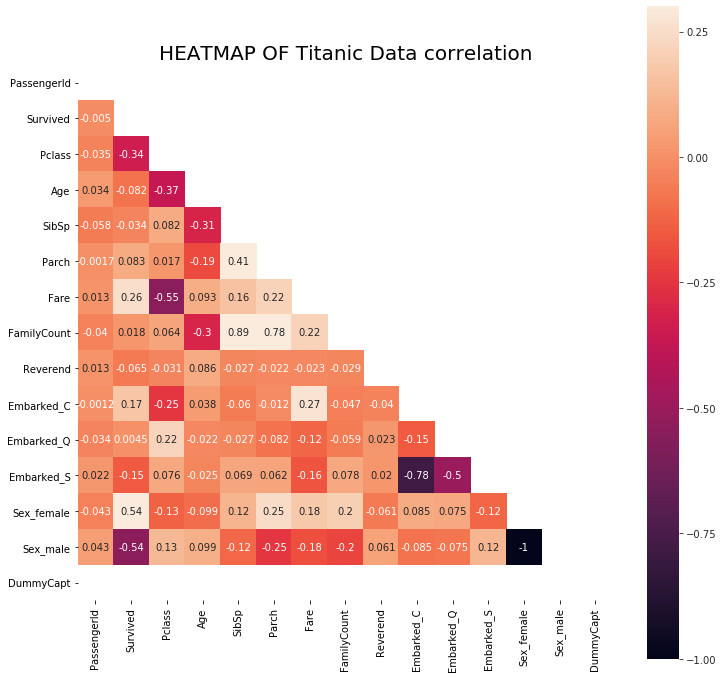

In [84]:
##heat map of correlation variables

##female and survival rate

##

plt.figure(figsize = (12,12))

##sns.heatmap(titanic_data.corr(), annot = True, cmap = 'coolwarm', vmax = 1, vmin = -1);

plt.title("HEATMAP OF Titanic Data correlation", fontdict= {'fontsize' : 20})

plt.xticks(rotation = 45)


mask = np.zeros_like(titanic_data.corr())
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(titanic_data.corr(), mask=mask, vmax=.3, square=True, annot=True)


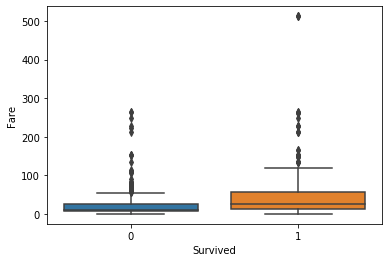

In [85]:
sns.boxplot(x = 'Survived', y = 'Fare', data = titanic_data )

In [86]:
titanic_data['LetterClass'] = titanic_data['Pclass'].map({1:'First', 2:'Second', 3:'Third'})

In [87]:
titanic_data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name   Age  SibSp  Parch  \
0                              Braund, Mr. Owen Harris  22.0      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                               Heikkinen, Miss. Laina  26.0      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                             Allen, Mr. William Henry  35.0      0      0   
..                                                 ...   ...    ...    ...   
886                              Montvila, Rev. Juozas  27.0      0      0   
887                       Graham, Miss. Margaret Edith  19.0      0      0   
888           Johnston, Miss. Catherine Helen "Carrie"   NaN      1      2   
889                              Behr, Mr. Karl Howell  26.0      0      0   
890                                Dooley, Mr. Patrick  32.0      0      0   

               Ticket     Fare    Cabin  FamilyCount  Reverend  Embarked_C  \
0           A/5 21171   7.2500  ¯\(ツ)/¯            1         0           0   
1            PC 17599  71.2833      C85            1         0           1   
2    STON/O2. 3101282   7.9250  ¯\(ツ)/¯            0         0           0   
3              113803  53.1000     C123            1         0           0   
4              373450   8.0500  ¯\(ツ)/¯            0         0           0   
..                ...      ...      ...          ...       ...         ...   
886            211536  13.0000  ¯\(ツ)/¯            0         1           0   
887            112053  30.0000      B42            0         0           0   
888        W./C. 6607  23.4500  ¯\(ツ)/¯            3         0           0   
889            111369  30.0000     C148            0         0           1   
890            370376   7.7500  ¯\(ツ)/¯            0         0           0   

     Embarked_Q  Embarked_S  Sex_female  Sex_male  DummyCapt LetterClass  
0             0           1           0         1          0       Third  
1             0           0           1         0          0       First  
2             0           1           1         0          0       Third  
3             0           1           1         0          0       First  
4             0           1           0         1          0       Third  
..          ...         ...         ...       ...        ...         ...  
886           0           1           0         1          0      Second  
887           0           1           1         0          0       First  
888           0           1           1         0          0       Third  
889           0           0           0         1          0       First  
890           1           0           0         1          0       Third  

[889 rows x 19 columns]

/Users/varunganti/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


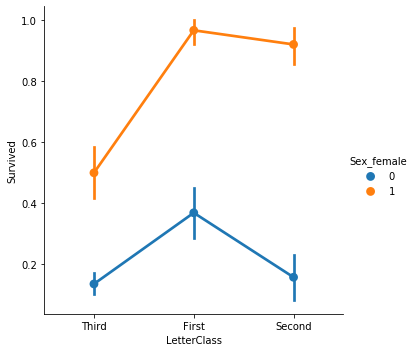

In [88]:
sns.factorplot(data=titanic_data, x= "LetterClass", y="Survived", hue='Sex_female')

# FACTORPLOT

Want to see the survival rate with a factor plot. Shows me that first class females had the highest survival rate

I suspect the same for first class

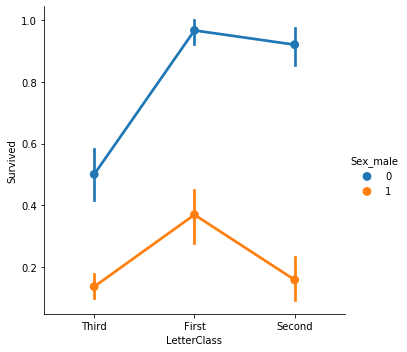

In [89]:
sns.factorplot(data=titanic_data, x= "LetterClass", y="Survived", hue='Sex_male')

# FACETDIST to show the distribution 

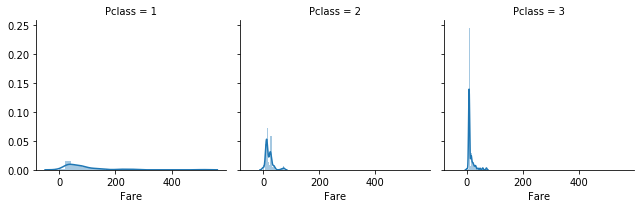

In [90]:
##g = sns.FacetGrid(titanic_data, col="Pclass") 
## g.map(sns.distplot, "Fare")

# BAR CHART 

See the difference of class for male. Shows the third class male died the most.

Easier representation of class and gender.

When we use predictive models we can use certain variables to predict an outcome suhc as survival or not survival

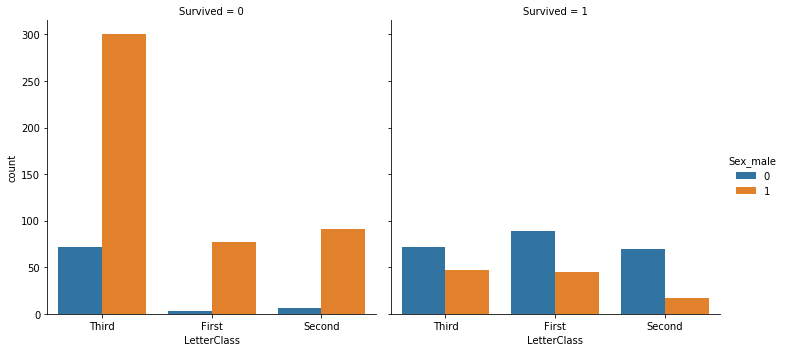

In [91]:
sns.factorplot(data=titanic_data, x= "LetterClass", col= "Survived", hue='Sex_male', kind = 'count')


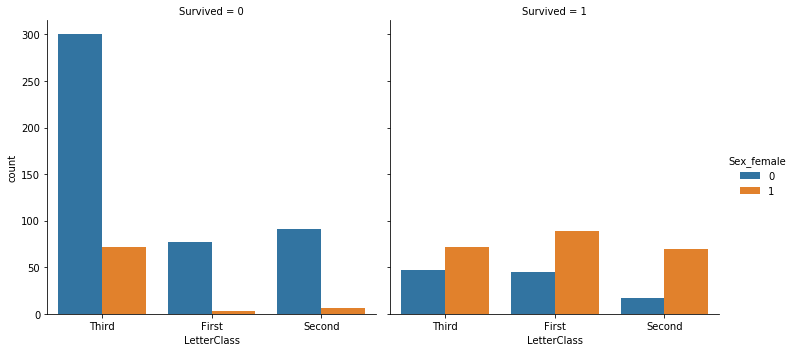

In [92]:
sns.factorplot(data=titanic_data, x= "LetterClass", col= "Survived", hue='Sex_female', kind = 'count')

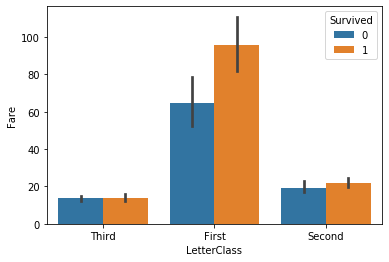

In [93]:
ax = sns.barplot(x="LetterClass", y="Fare", hue="Survived", data=titanic_data)


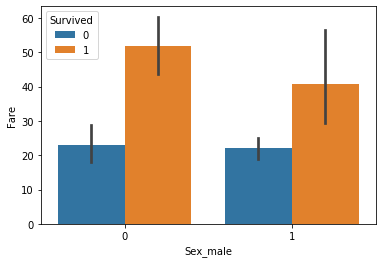

In [94]:
ax = sns.barplot(x="Sex_male", y="Fare", hue="Survived", data=titanic_data)

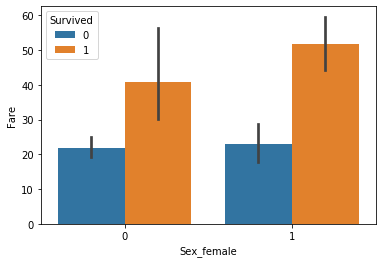

In [95]:
ax = sns.barplot(x="Sex_female", y="Fare", hue="Survived", data=titanic_data)

# Conculsion

This project gave me the tools to use EDA on real data. The exposure to different functiona that python has makes it a powerful tool to clean, analyze, and visualize data Understanding distributions by surival rate, in this case, allows us to make real worl assumptions on our data